In [1]:
import tensorflow as tf
print ("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
observations = 100000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10,10, (observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs, targets=generated_targets)



In [17]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd', loss=tf.keras.losses.Huber(delta=1.0), metrics=['mean_absolute_error'])
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)



Epoch 1/100
3125/3125 - 12s - 4ms/step - loss: 0.7985 - mean_absolute_error: 1.1567
Epoch 2/100
3125/3125 - 8s - 3ms/step - loss: 0.1680 - mean_absolute_error: 0.5008
Epoch 3/100
3125/3125 - 11s - 3ms/step - loss: 0.1681 - mean_absolute_error: 0.5010
Epoch 4/100
3125/3125 - 10s - 3ms/step - loss: 0.1682 - mean_absolute_error: 0.5012
Epoch 5/100
3125/3125 - 8s - 3ms/step - loss: 0.1679 - mean_absolute_error: 0.5006
Epoch 6/100
3125/3125 - 11s - 3ms/step - loss: 0.1680 - mean_absolute_error: 0.5008
Epoch 7/100
3125/3125 - 12s - 4ms/step - loss: 0.1680 - mean_absolute_error: 0.5007
Epoch 8/100
3125/3125 - 8s - 3ms/step - loss: 0.1681 - mean_absolute_error: 0.5009
Epoch 9/100
3125/3125 - 12s - 4ms/step - loss: 0.1680 - mean_absolute_error: 0.5007
Epoch 10/100
3125/3125 - 20s - 6ms/step - loss: 0.1680 - mean_absolute_error: 0.5007
Epoch 11/100
3125/3125 - 12s - 4ms/step - loss: 0.1682 - mean_absolute_error: 0.5011
Epoch 12/100
3125/3125 - 17s - 5ms/step - loss: 0.1681 - mean_absolute_error:

In [19]:
model.layers[0].get_weights()
weights, biases = model.layers[0].get_weights()
weights= model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
weights, biases

(array([[ 1.9856204],
        [-2.9933767]], dtype=float32),
 array([4.9973936], dtype=float32))

In [20]:
model.predict_on_batch(training_data['inputs'][:10])

array([[-26.683704 ],
       [ 16.68118  ],
       [-39.700115 ],
       [  5.350359 ],
       [ 46.130497 ],
       [ 13.260037 ],
       [  2.9259348],
       [ 16.118519 ],
       [ 14.069318 ],
       [-18.615044 ]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

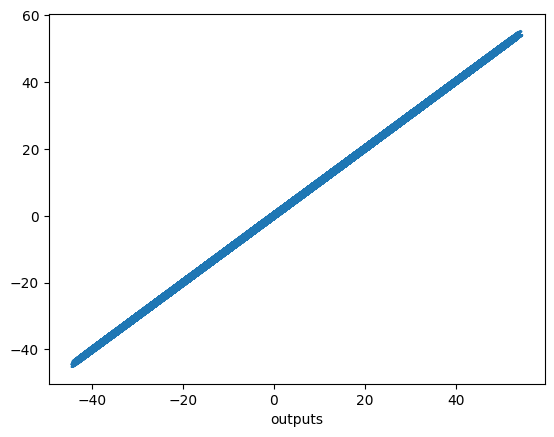

In [21]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel
plt.show